In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# About the dataset

we will use iris data set  

  1.it has 4 features
     * sepal_length
     * sepal_width
     * petal_length
     * petal_width
      All in cm 
  2. From 3 classes
     * iris-setosa
     * Iris-versicolor
     * Iris-virginica
     
     
  Let's read the data set to know this :   

In [33]:
iris_data = pd.read_csv('E:/Github_dir/data_analysis_py/Iris_data_analyasis_and_flower_prediction/iris-data.csv')

In [34]:
iris_data.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [35]:
iris_data['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

# Let's begin the analysis

###   Pie-Chart  representation of each class 

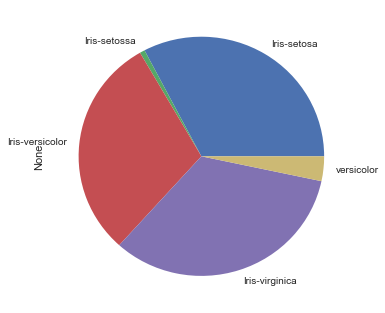

In [36]:
iris_data.groupby(by='class').size().plot(kind='pie',figsize=(5.5,5.5))

### We add the iris-setossa and versicolor to repective iris-setosa and iris-versicolor

we create a function to chnage the above

In [37]:
iris_data.loc[iris_data['class']=='versicolor','class']='Iris-versicolor'
iris_data.loc[iris_data['class']=='Iris-setossa','class']='Iris-setosa' 

In [38]:
iris_data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


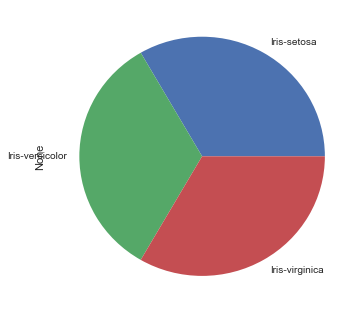

In [39]:
iris_data.groupby(by='class').size().plot(kind='pie',figsize=(5.5,5.5))

### DIstribution of each feature using density plot

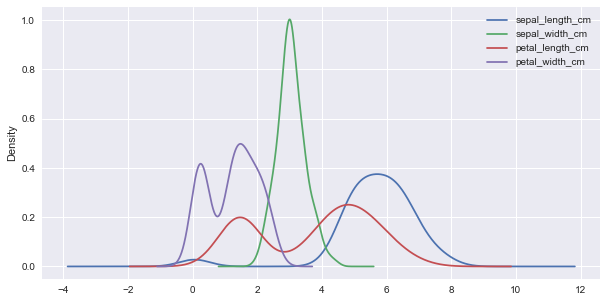

In [40]:
iris_data.plot(kind='kde',figsize=(10,5))

### scatter plot representation using seaborn


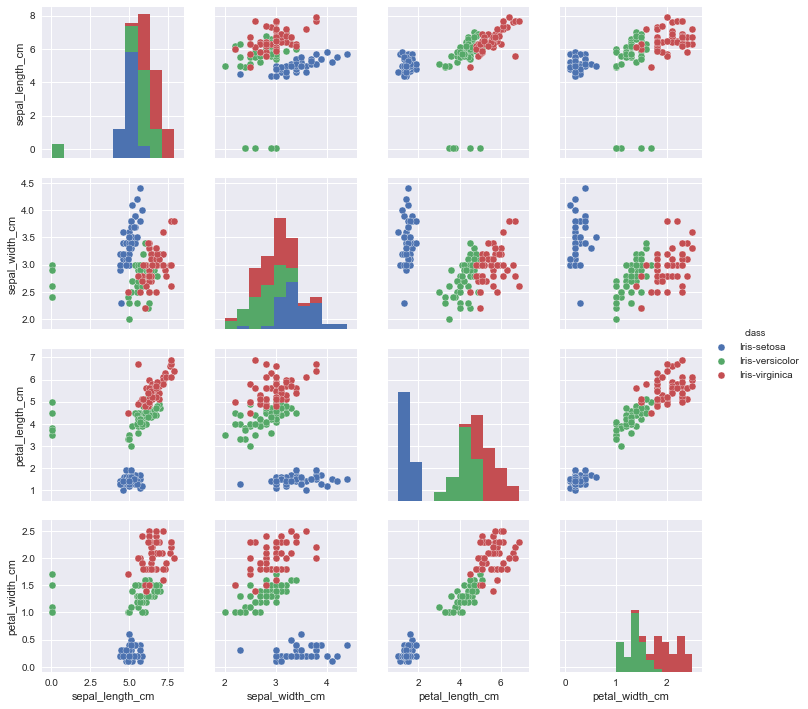

In [41]:
sns.pairplot(iris_data,hue='class')

From the scatterplot we can see that there are some outliers in sepal_width_cm row   
of Iris-setosa falls well outside from its' normal range


In the case of the one anomalous entry for Iris-setosa, let's say our field researchers know that it's impossible for Iris-setosa to have a sepal width below 2.5 cm. Clearly this entry was made in error, and we're better off just scrapping the entry than spending hours finding out what happened.

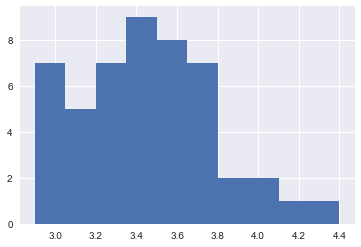

In [42]:
# we should get rid of outliers

iris_data = iris_data.loc[(iris_data['class']!='Iris-setosa') | (iris_data['sepal_width_cm'] >=2.5)]

iris_data.loc[iris_data['class'] == 'Iris-setosa','sepal_width_cm'].hist()

From the scatterplot we can see that there are some outliers in sepal_length_cm row
of Iris-versicolor. we can see that the some of the data is almost near zero for no reason and fall outside of its line

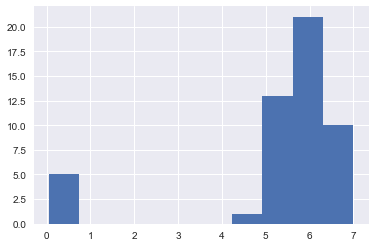

In [43]:
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [44]:
# showing the near zero Iris-versicolor and sepal_length_cm 

iris_data.loc[(iris_data['class']=='Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


Seems like the sepal_length_cm is not in cm but in meters   

Let's convert those values to cm by multiplying 100

In [45]:
iris_data.loc[(iris_data['class']=='Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0),'sepal_length_cm'] *= 100.0

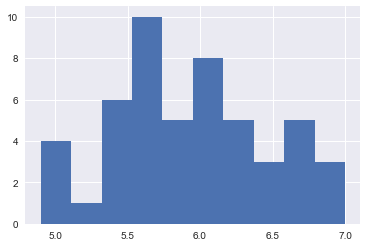

In [46]:
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [47]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
               (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
               (iris_data['petal_width_cm'].isnull()) ]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


Deleteing NaN rows may affect the data set more rather tahn repalcing with mean values

So in the next we replace the null values with mean values of that row

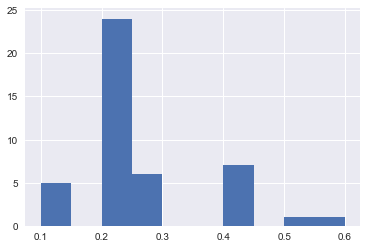

In [48]:
iris_data.loc[iris_data['class']=='Iris-setosa','petal_width_cm'].hist()

In [49]:
# as mean most of the value lies in b/w 0.2 to 0.3
mean_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class']=='Iris-setosa') & iris_data['petal_width_cm'].isnull(),'petal_width_cm'] = \
                                           mean_petal_width

In [50]:
iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == mean_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


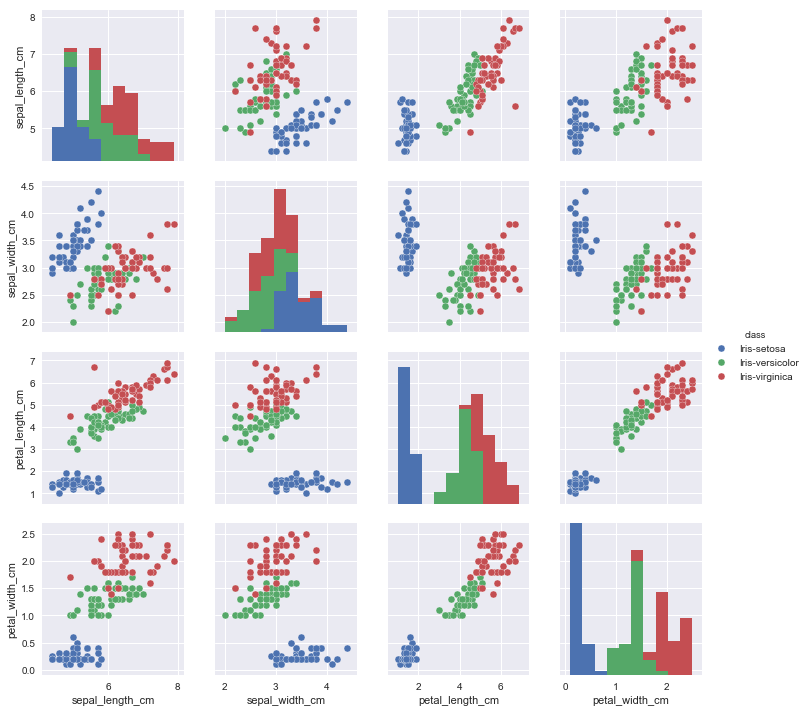

In [51]:
sns.pairplot(iris_data,hue='class')

We can see the outliers are gone 

## Violin plot representaion  of the clean data

We can  make violin plots of the data to compare the measurement distributions of the classes.
It contain same data  as box plot but shows the data in scale basis

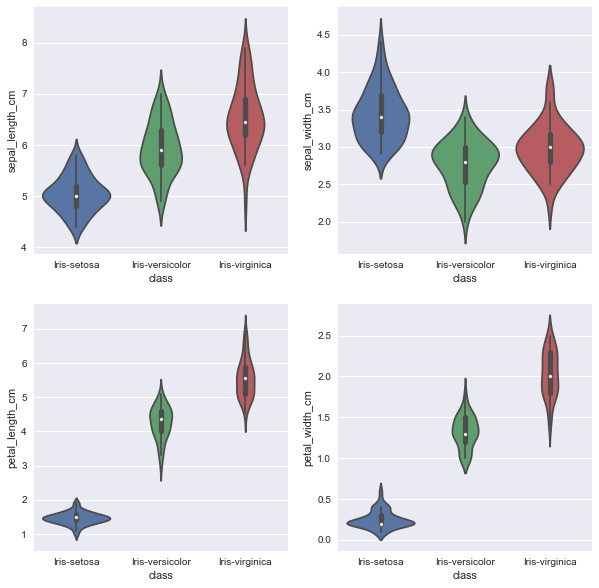

In [52]:
plt.figure(figsize=(10,10))

for column_index,column in enumerate(iris_data.columns):
    if column == 'class':
        continue
    
    plt.subplot(2,2,column_index+1)
    sns.violinplot(x='class',y=column,data=iris_data)
    

## Boxplot representation of  the iris data

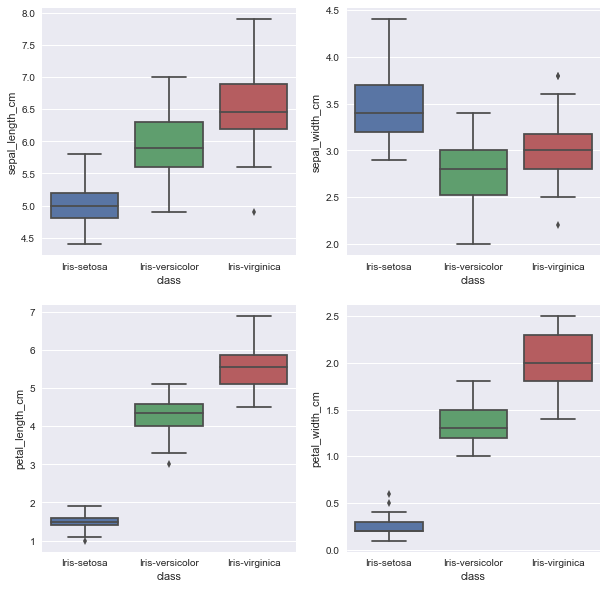

In [53]:
plt.figure(figsize=(10,10))

for column_index,column in enumerate(iris_data.columns):
    if column == 'class':
        continue
    
    plt.subplot(2,2,column_index+1)
    sns.boxplot(x='class',y=column,data=iris_data)

# Data modeling and classification

Enough of flirting with data let's jump to data modeling and prediction

let's split the data into training set and testing set 

A 'training set' is a random subset of the data that we use to train our models.

A testing set is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

In [54]:
all_inputs = iris_data[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data['class'].values



In [55]:
from sklearn.cross_validation import train_test_split

In [56]:
(train_input,test_input,train_class,test_class) = train_test_split(all_inputs,all_classes,train_size=0.75,random_state=1)

Our data is splited 

Now let's apply decisison tree classifier

### DECISION TREE CLASSIFIER

Decision tree classifiers are incredibly simple in theory. In their simplest form, decision tree classifiers ask a series of  
Yes/No questions about the data — each time getting closer to finding out the class of each entry — until they either classify the data set perfectly or simply can't differentiate a set of entries

In [61]:
from sklearn.tree import DecisionTreeClassifier

#create classifier object
d_t_c = DecisionTreeClassifier()

#train the classifier on training set

d_t_c.fit(train_input,train_class)

#validate the classifier on test set using classification accuracy

d_t_c.score(test_input,test_class)

0.97368421052631582

Our model achieves 97.3 % accuracy   

However, there's a catch: Depending on how our training and testing set was sampled, our model can achieve anywhere from 80% to 100% accuracy:

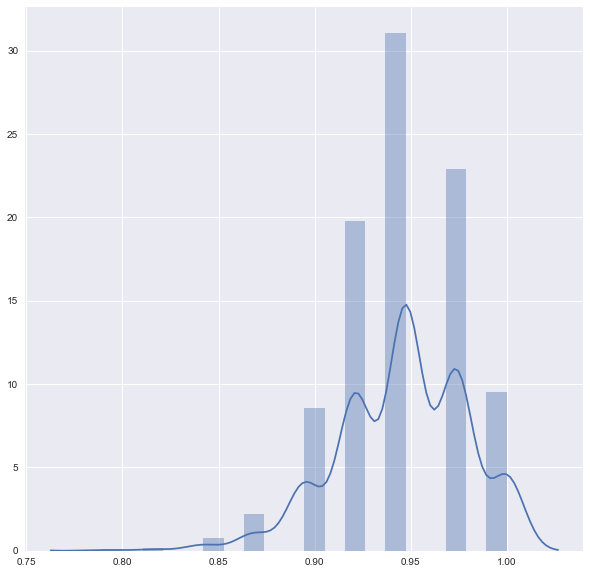

In [65]:
plt.figure(figsize=(10,10))

accuracies = []

for repetition in range(1000):
    (train_input,
     test_input,
     train_class,
     test_class) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(train_input, train_class)
    accuracy = decision_tree_classifier.score(test_input, test_class)
    accuracies.append(accuracy)
    
sns.distplot(accuracies)